### Brusselator model
This notebook explores the emergence of stripe and spot patterns in the Brusselator. The Brussdelator is a two-component PDE model of an autocatalytic chemical reaction and given by
$$
\begin{align}
u_t &  = D_1 \Delta u + a - (b+1)u + u^2v \\
v_t & = D_2 \Delta v + bu - u^2v
\end{align}
$$
where $\Delta=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}$ in the Laplacian. This PDE admits the spatially homogeneous stationary solution $(u,v)(x,y,t)=(a,b/a)$. For appropriate values of the constant parameters $D_1, D_2, a, b$, this steady state becomes unstable in a Turing bifurcation, and stripe or spot patterns emerge.

First, we load the necessary Python modules.

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

Next, we define the following functions:
* `discrete_laplacian` provides a centered finite-difference approximation of the Laplacian;
* `update_solution` uses the forward Euler method to update the solution to the next time step;
* `update_graph` animates the solution.

In [2]:
def discrete_laplacian(u):
    # uses periodic boundary conditions
    L = -4*u
    L += np.roll(u, (0,-1), (0,1)) # right neighbor
    L += np.roll(u, (0,+1), (0,1)) # left neighbor
    L += np.roll(u, (-1,0), (0,1)) # top neighbor
    L += np.roll(u, (+1,0), (0,1)) # bottom neighbor
    return L

def update_solution(f, g, dt, pars, Nframes, Nskip):
    n = 0
    u = f
    v = g
    d1 = pars[0]
    d2 = pars[1]
    a = pars[2]
    b = pars[3]
    while n<Nframes:
        n += 1
        for k in range(Nskip):
            u += (d1*discrete_laplacian(u) + a - (b+1)*u + u**2*v) * dt
            v += (d2*discrete_laplacian(v) + b*u - u**2*v) * dt
        yield [u, v]

def update_graph(U, imu, imv):
    imu.set_array(U[0][:])
    imv.set_array(U[1][:])

In the next cell, we define the parameters of our model, set the initial condition, and run the animation of the solution. For $D_1=1, D_2=8, a=4.5$, the Turing instability is visible for $b>6.71$. In particular, we observe spots for $b=6.9$, stripes for $b=7.55$, and different spots for $b=11.5$.

<IPython.core.display.Javascript object>


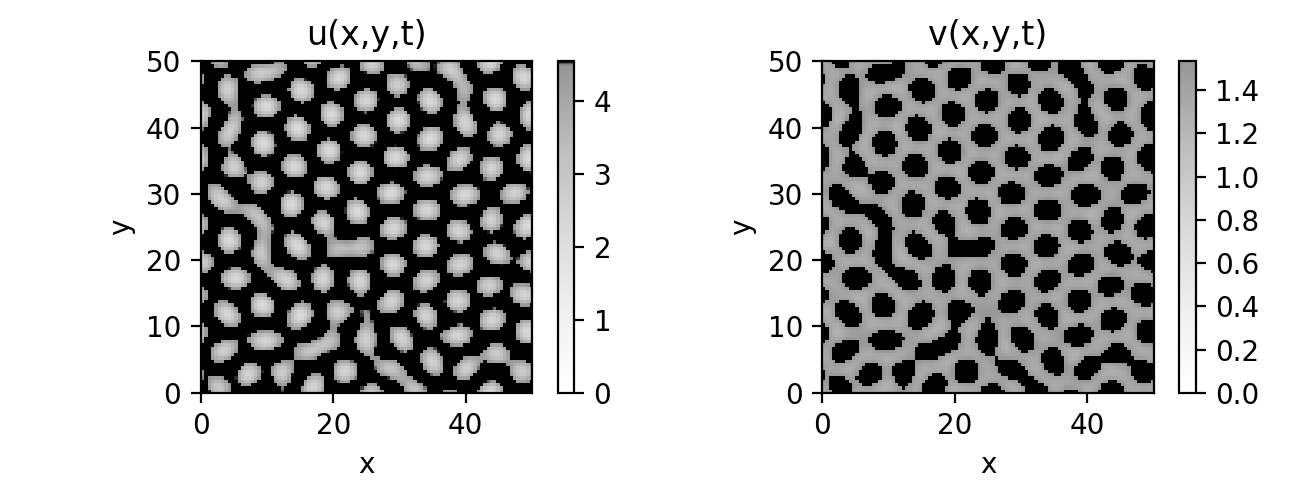

In [3]:
# model parameters
L = 50
D1 = 1
D2 = 8
a = 4.5
b = 6.9

# numerical parameters
N = 100     # grid size

# animation parameters
Nsteps = 15000
Nskip = 20

# set time step to satisfy stability criterion (cfl<0.5)
cfl = 0.2
dx = L/N
dt = cfl * dx**2 / D2

# compute and animate solution
Nframes = int(Nsteps/Nskip)

# set initial condition
x = np.linspace(0, L, N, endpoint=False)
X, Y = np.meshgrid(x, x)
f = a + 0.05*np.random.random((N,N))
g = b/a + 0*np.random.random((N,N))

# animation parameters
N_simulation_steps = 15000
updates_per_frame = 20

# set effective diffusion coefficients
pars = [D1/dx**2, D2/dx**2, a, b]

# compute and animate solution
fig, ax = plt.subplots(1,2,figsize=(6.5,2.5))
extent = [0, L, 0, L]
cmOffsetU = colors.TwoSlopeNorm(vmin=0, vcenter=a)
cmOffsetV = colors.TwoSlopeNorm(vmin=0, vcenter=b/a)
imu = ax[0].imshow(f, animated=True, cmap='Greys', extent=extent, norm=cmOffsetU, origin='lower')
imv = ax[1].imshow(g, animated=True, cmap='Greys', extent=extent, norm=cmOffsetV, origin='lower')
ax[0].set_title('u(x,y,t)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_title('v(x,y,t)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
fig.colorbar(imu, ax=ax[0])
fig.colorbar(imv, ax=ax[1])
ani = animation.FuncAnimation(fig, update_graph,
                              update_solution(f, g, dt, pars, Nframes, Nskip),
                              fargs=(imu, imv), interval=10, blit=True, repeat=False)
plt.tight_layout()
plt.show()